# Neural Networks

Neural Networks are powerful learning algorithm inspired by how the brain works.

Before diving into the details let's talk a little bit about how Neural Networks works.

Recall the house price prediciton from first session, which we have a vector of house features like size, number of bedrooms, etc. and we want to estimate the house price by employing a machine learning techniques. 

$$
x = \begin{bmatrix}size \\ \# of bedrooms \\zip code \\ wealth\end{bmatrix} \rightarrow y = Price
$$

However, as we mentioned in earlier sessions these raw features may not be appropriate for machine learning algorithms. So we need to apply some feature engineering techniques to reduce, transform an prepare the features. In other words we transform the features to another space that is more informative for the desired task. For example, in classification task the discrimination of feature space is plays a key role in classifiers performance. So if the initial feature space does not have this attribute in feature engineering phase we transform it to a more dircriminative space.

**Neural Networks** apply some **learnable** transformations over and over to reach a feature space (latent space) which is best for the desired task. In other words they apply feature engineering phase automatically.

<img src="images/neural_networks.png" alt="neural networks" width="400" height="400">

https://playground.tensorflow.org/

## A Single Neuron

Recall from logistic regression session the below figure:

<img src="images/nn_single_neuron.png" alt="single neuron" width="400" height="400">

this is exactly the structre of each neuron in neural network structure. It means each neuron in a neural network takes the outputs of previous layer, apply a linear function then feed to a nonlinaer function. The feature transformation in neural networks is constructed by identical simple linear-nonlinear building blocks.

<img src="images/nn_multi_neuron.png" alt="single neuron" width="400" height="400">

## Common Non Linearities (Activation Functions) in Neural Networks

### 1. Sigmoid

<img src="images/sigmoid.png" alt="sigmoid" width="400" height="400">

If we look carefully at the graph towards the ends of the function, y values react very little to the changes in x. Let’s think about what kind of problem it is! The derivative values in these regions are very small and converge to 0. This is called the vanishing gradient and the learning is minimal. if 0, not any learning! When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model. So let’s continue our search for an alternative activation function!

### 2. Tanh

<img src="images/tanh.png" alt="tanh" width="400" height="400">

The advantage over the sigmoid function is that its derivative is more steep, which means it can get more value. This means that it will be more efficient because it has a wider range for faster learning and grading. But again, the problem of gradients at the ends of the function continues. Although we have a very common activation function, we will continue our search to find the best one!

### 3. RELU

<img src="images/relu.png" alt="relu" width="400" height="400">

Let’s imagine a large neural network with too many neurons. Sigmoid and hyperbolic tangent caused almost all neurons to be activated in the same way. This means that the activation is very intensive. Some of the neurons in the network are active, and activation is infrequent, so we want an efficient computational load. We get it with ReLU. Having a value of 0 on the negative axis means that the network will run faster. The fact that the calculation load is less than the sigmoid and hyperbolic tangent functions has led to a higher preference for multi-layer networks. Super! But even ReLU isn’t exactly great, why? Because of this zero value region that gives us the speed of the process! So the learning is not happening in that area. Then you need to find a new activation function with a trick.

### 4. Lealy RELU

<img src="images/lealy_relu.png" alt="lealy relu" width="400" height="400">

more on this topic: https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a

## Mathematical Formulation

<img src="images/layer_with_notation.png" alt="with notation" width="400" height="400">

$$
z_1 = w_1^1x_1 + w_2^1x_2 + w_3^1x_3 + b^1 \\
a_1 = \sigma(z_1)
$$

$$
z_2 = w_1^2x_1 + w_2^2x_2 + w_3^2x_3 + b^2 \\
a_2 = \sigma(z_2)
$$

### Matrix Notation

$$
z_1 = w_1^1x_1 + w_2^1x_2 + w_3^1x_3 + b^1 \\
z_2 = w_1^2x_1 + w_2^2x_2 + w_3^2x_3 + b^2 \\
z_3 = w_1^3x_1 + w_2^3x_2 + w_3^3x_3 + b^3 \\
z_4 = w_1^4x_1 + w_2^4x_2 + w_3^4x_3 + b^4 \\
$$

$$
\begin{bmatrix}z_1 \\ z_2 \\z_3 \\ z_4\end{bmatrix} = \begin{bmatrix}w_1^1 & w_2^1 & w_3^1 \\ w_1^2 & w_2^2 & w_3^2 \\ w_1^3 & w_2^3 & w_3^3 \\ w_1^4 & w_2^4 & w_3^4\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\x_3\end{bmatrix} + \begin{bmatrix}b^1 \\ b^2 \\b^3 \\ b^4\end{bmatrix} \\
\textbf{z} = \textbf{W}\textbf{x} + \textbf{b}
$$

$$
\begin{bmatrix}a_1 \\ a_2 \\a_3 \\ a_4\end{bmatrix} = \sigma(\begin{bmatrix}z_1 \\ z_2 \\z_3 \\ z_4\end{bmatrix}) \\
\textbf{a} = \sigma(\textbf{z})
$$

for each layer of neural network:

$$
\textbf{z}^{[l]} = \textbf{W}^{[l]}\textbf{a}^{[l-1]} + \textbf{b}^{[l]} \\
\textbf{a}^{[l]} = \sigma(\textbf{z}^{[l]})
$$

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

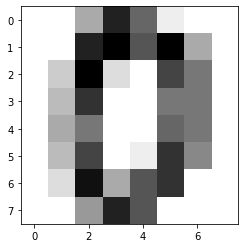

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [7]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [8]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

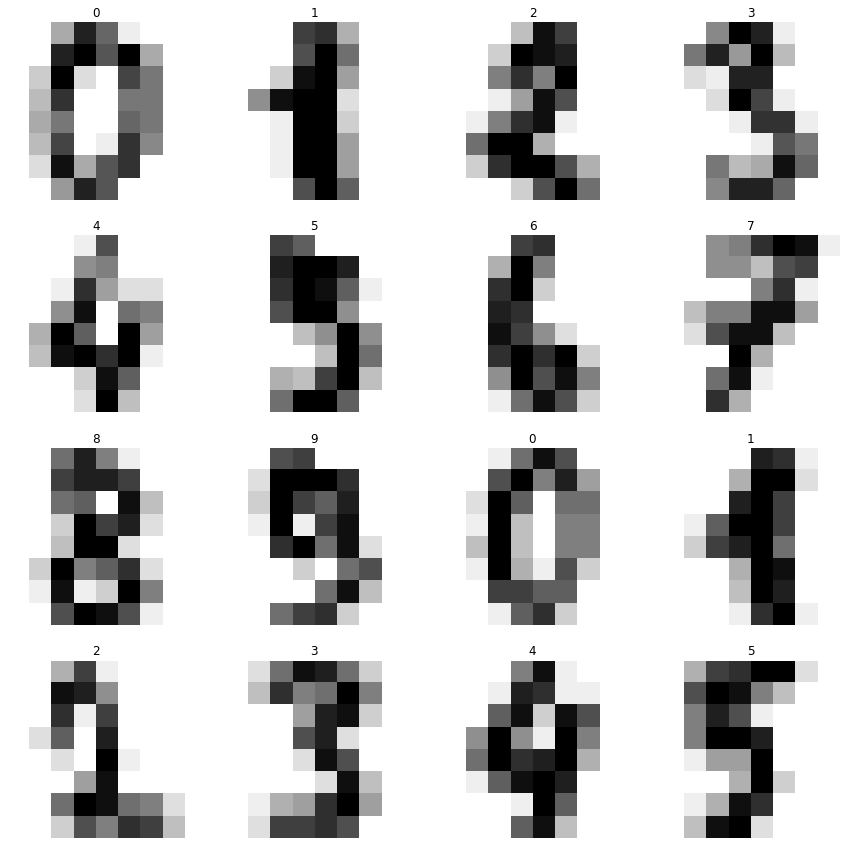

In [9]:
plot_multi(0)

In [11]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

In [12]:
x.shape

(1797, 64)

In [19]:
1797/8

224.625

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<img src="images/multi_class_mlp.png" alt="neural networks" width="400" height="400">

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [18]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.17958699
Iteration 2, loss = 1.77146055
Iteration 3, loss = 1.37439429
Iteration 4, loss = 1.02004886
Iteration 5, loss = 0.75415292
Iteration 6, loss = 0.57924176
Iteration 7, loss = 0.45963913
Iteration 8, loss = 0.37982746
Iteration 9, loss = 0.32033652
Iteration 10, loss = 0.28769840
Iteration 11, loss = 0.24265526
Iteration 12, loss = 0.21130886
Iteration 13, loss = 0.19594798
Iteration 14, loss = 0.17002398
Iteration 15, loss = 0.15547854
Iteration 16, loss = 0.14189883
Iteration 17, loss = 0.13746330
Iteration 18, loss = 0.12195878
Iteration 19, loss = 0.12207813
Iteration 20, loss = 0.11055786
Iteration 21, loss = 0.10030376
Iteration 22, loss = 0.09741844
Iteration 23, loss = 0.08985571
Iteration 24, loss = 0.08772165
Iteration 25, loss = 0.08282575
Iteration 26, loss = 0.08106593
Iteration 27, loss = 0.08030491
Iteration 28, loss = 0.07282371
Iteration 29, loss = 0.07003939
Iteration 30, loss = 0.06810777
Iteration 31, loss = 0.06578545
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [25]:
mlp.score(x_test, y_test)

0.9533333333333334

## Training Neural Networks

recall from previous sessions, most of the machine learning training algorithms (neural networks in this case) consist of these steps:

1. Choose a  neural network structure like this:

<img src="images/neural_networks.png" alt="neural networks" width="400" height="400">

2. Initialize weights $W$ and biases $b$ of the network.

3. Feed all datapoints to the network and compute the network output. (feed forward) 

4. compute a loss function for all outputs:

$$
\frac{1}{N}\sum_{i=1}^{N}L(y_{pred}^{(i)}, y_{true}^{(i)})
$$

5. Compute the gradient of loss function with respect to model weights and biases. (back propagation)

$$
\frac{\partial L}{\partial W}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial L^{(i)}}{\partial W} \\
\frac{\partial L}{\partial b}=\frac{1}{N}\sum_{i=1}^{N}\frac{\partial L^{(i)}}{\partial b}
$$

6. Update weights and biases with gradient descent algorithm:
$$
W^{new} = W^{old} - lr \times \frac{\partial L}{\partial W^{old}}
$$

7. back to step 3 and iterate until convergence

Although this method can effectivly find the (local) minimum of cost function, it can be computationally expensive since for each step of optimization all of datapoints should be fed into the network.

### Mini-Batch Gradient Descent

<img src="images/minibatch.png" alt="neural networks" width="350" height="350">

In this approach first we divide the dataset into number of batches with an equal number of data in each batch (batch size). Then in each optimization step feed just one batch to network and update weights and biases, then feed next batch, and so on. When all batches have been fed to the network we say one **epoch** have been completed. We can train several epochs until the optimization technique converge to a solution.

The special case of mini-batch gradient descent is called **Stochastic Gradient Descent (SGD)** in which the batch size is equal to one. In other word each optimization step is performed by just one data point

Since the mini-batch gradient descent is performed on a group of data points in each step and not all data points. the direction of weights update is a little bit different from the original gradient descent and have a little noise.

<img src="images/minibatch_vs_batch_gd.png" alt="neural networks" width="400" height="400">

So there are number of optimization algorithms that solve this problem and act like a denoising filter for mini-batch gradient descent. Some of the famous optimization algorithms in Neural Networks are:
1. RMSprop
2. Adam
3. AdaDelta

## Back Propagation

Backpropagation is the essence of neural network training. It is the method of computing the gradient of the weights of a neural network based on the error rate obtained in the iteration.

Backpropagation in neural network is a short form for "backward propagation of errors." It is a standard method of training artificial neural networks. This method helps calculate the gradient of a loss function with respect to all the weights in the network.

The Back propagation algorithm in neural network computes the gradient of the loss function for a single weight by the **chain rule**. It efficiently computes one layer at a time, unlike a native direct computation.

<img src="images/backpropagation.png" alt="back propagation" width="400" height="400">

For computing the gradient of each layer's weights we need the gradient of next layer.

### Vanishing Gradient Problem

As we mentioned the gradient of each layer is a function of next layers. For example to computing the early layer's gradients in an n-hidden layer network, the gradient of n activation function is multiplied. 

when n hidden layers use an activation like the sigmoid function, n small derivatives are multiplied together. Thus, the gradient decreases exponentially as we propagate down to the initial layers.

A small gradient means that the weights and biases of the initial layers will not be updated effectively with each training session. Since these initial layers are often crucial to recognizing the core elements of the input data, it can lead to overall inaccuracy of the whole network.

For shallow network with only a few layers that use these activations, this isn’t a big problem. However, when more layers are used, it can cause the gradient to be too small for training to work effectively.

There are ways to detect whether your deep network is suffering from the vanishing gradient problem:
1. The model will improve very slowly during the training phase and it is also possible that training stops very early, meaning that any further training does not improve the model.
2. The weights closer to the output layer of the model would witness more of a change whereas the layers that occur closer to the input layer would not change much (if at all).
3. Model weights shrink exponentially and become very small when training the model.
4. The model weights become 0 in the training phase.

The simplest solution is to use other activation functions, such as ReLU, which doesn’t cause a small derivative.

### Exploding Gradient

This is exactly the opposite of vanishing gradient problem. In a network of n hidden layers, n derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient.

There are few subtle methods that you may use to determine whether your model is suffering from the problem of exploding gradients;


1. The model is not learning much on the training data therefore resulting in a poor loss.
2. The model will have large changes in loss on each update due to the models instability.
3. The model will have large changes in loss on each update due to the models instability.

Checking for and limiting the size of the gradients whilst our model trains is a common solution for exploding gradient.

A more careful initialization choice of the random initialization for your network tends to be a partial solution, since it does not solve the problem completely.